# Reading dataset

In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('C:/Users/Rajinder/forestfires.csv')

In [5]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# Exploratory Data Analysis

In [6]:
data.shape

(517, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [8]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [9]:
data.count()

X        517
Y        517
month    517
day      517
FFMC     517
DMC      517
DC       517
ISI      517
temp     517
RH       517
wind     517
rain     517
area     517
dtype: int64

In [10]:
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

From the code we found out that there are no missing values in our dataset.

# Outlier Detection

In [13]:
df = pd.DataFrame(data, columns = ['X','Y','FFMC','DMC','ISI','temp','RH','wind','rain','area'])
df

,X,Y,FFMC,DMC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,5.1,8.2,51,6.7,0.0,0.00
1,7,4,90.6,35.4,6.7,18.0,33,0.9,0.0,0.00
2,7,4,90.6,43.7,6.7,14.6,33,1.3,0.0,0.00
3,8,6,91.7,33.3,9.0,8.3,97,4.0,0.2,0.00
4,8,6,89.3,51.3,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,1.9,27.8,32,2.7,0.0,6.44
513,2,4,81.6,56.7,1.9,21.9,71,5.8,0.0,54.29
514,7,4,81.6,56.7,1.9,21.2,70,6.7,0.0,11.16
515,1,4,94.4,146.0,11.3,25.6,42,4.0,0.0,0.00


In [16]:
columns = df.columns.tolist()

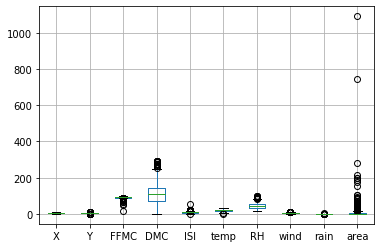

In [19]:
df.boxplot(column=columns)

From the above boxplot we can somewhat figure out that the columns like area, FFMC and DMC have more number of visible outliers as compared to other columns. So now we will have a closer look on these columns.

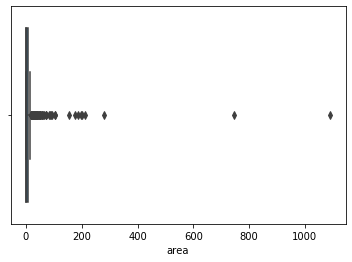

In [21]:
import seaborn as sb
sb.boxplot(x=df['area'])

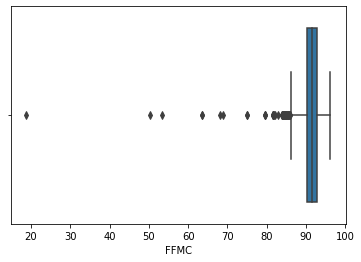

In [22]:
sb.boxplot(x=df['FFMC'])

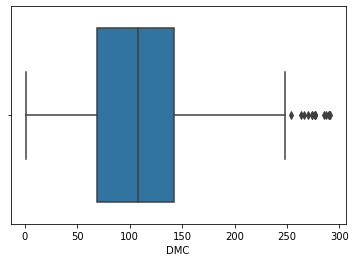

In [23]:
sb.boxplot(x=df['DMC'])

### After plotting area, FFMC and DMC we figure out that all these attributes have way more outliers that needs to be removed.

# Removing outliers

In [24]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [27]:
df = remove_outlier(df,'FFMC')
df = remove_outlier(df,'DMC')
df = remove_outlier(df,'area')

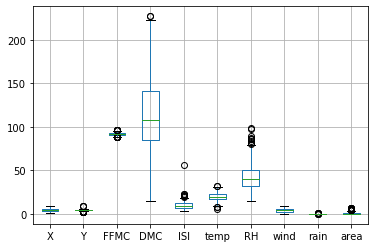

In [28]:
df.boxplot(column=columns)

We still see that the attribute RH also has visible outliers that can be removed.

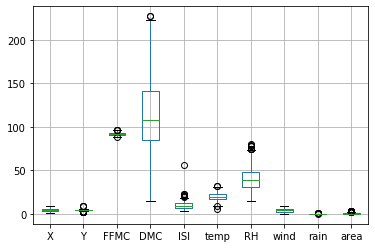

In [30]:
df = remove_outlier(df,'RH')
df.boxplot(column=columns)

As we can see now from the above boxplot that the data looks much cleaner and can be used further.

# Pearson Correlation Analysis

In [34]:
df.corr()

,X,Y,FFMC,DMC,ISI,temp,RH,wind,rain,area
X,1.000000,0.545482,-0.020100,-0.015240,0.032201,0.000494,0.011159,-0.020676,0.098668,0.033573
Y,0.545482,1.000000,0.072798,0.045952,0.028643,0.051644,-0.041972,-0.022053,0.037649,0.095645
FFMC,-0.020100,0.072798,1.000000,0.406095,0.574961,0.505529,-0.225277,-0.012031,0.107385,0.007169
DMC,-0.015240,0.045952,0.406095,1.000000,0.218033,0.495419,0.111688,-0.144758,0.175172,0.099992
ISI,0.032201,0.028643,0.574961,0.218033,1.000000,0.238312,-0.038568,0.193563,0.050657,-0.008965
temp,0.000494,0.051644,0.505529,0.495419,0.238312,1.000000,-0.483194,-0.150471,0.038983,0.061271
RH,0.011159,-0.041972,-0.225277,0.111688,-0.038568,-0.483194,1.000000,0.036373,0.254486,0.043387
wind,-0.020676,-0.022053,-0.012031,-0.144758,0.193563,-0.150471,0.036373,1.000000,0.171255,-0.010156
rain,0.098668,0.037649,0.107385,0.175172,0.050657,0.038983,0.254486,0.171255,1.000000,0.015918
area,0.033573,0.095645,0.007169,0.099992,-0.008965,0.061271,0.043387,-0.010156,0.015918,1.000000


Pearson Correlation Coefficient is a measure of linear correlation between two sets of data and its value lies between -1 and 1. We here used a correlation metrix to identify the correlations but for better understanding we will depict the same using a heatmap.

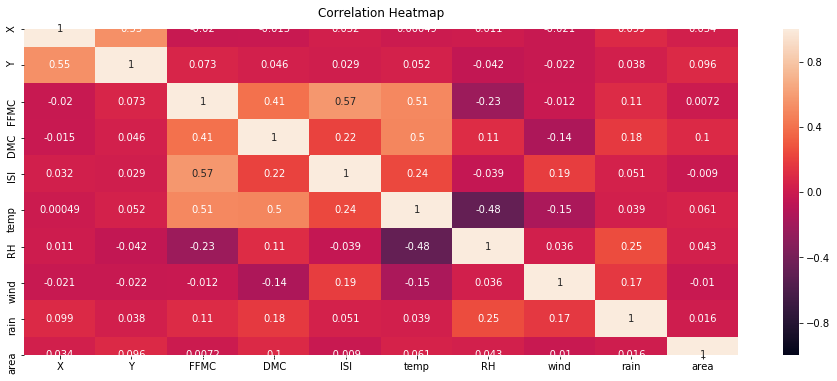

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
heatmap = sb.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

From the above heatmap we see that we do not have anysuch correalted attributes

# Pairwise plots

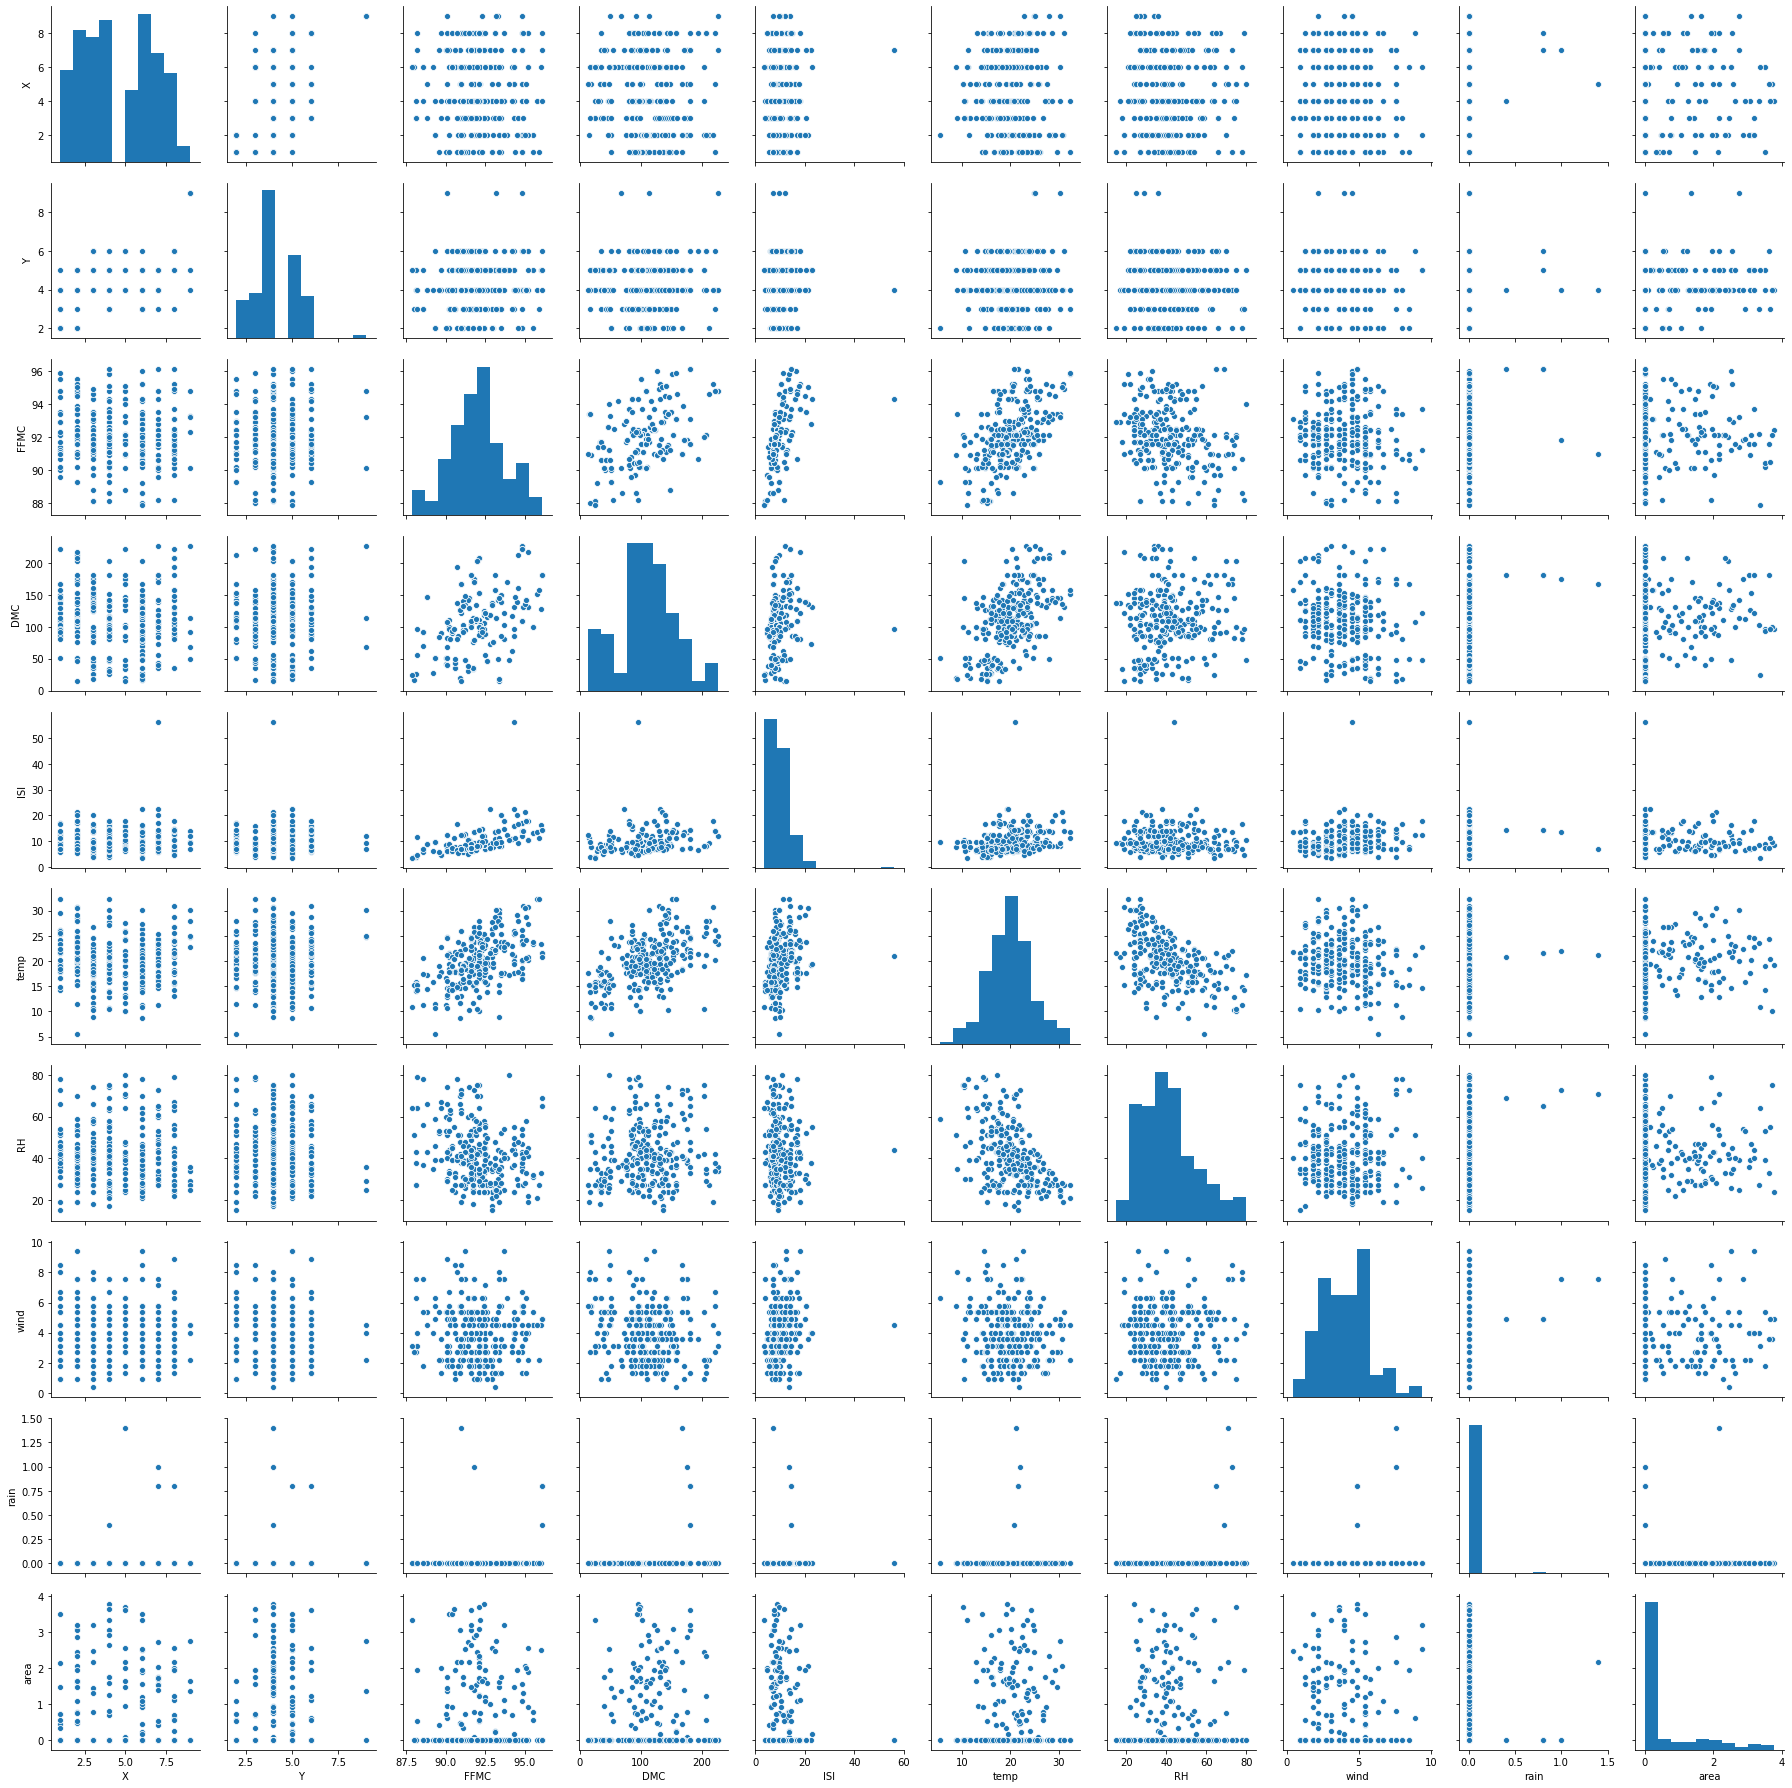

In [38]:
sb.pairplot(df)

The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship between two variables.